In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

C:\Users\Narsimha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Narsimha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("fake_job_postings.csv")

In [3]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
data.shape

(17880, 18)

In [5]:
#print(data.info())


In [6]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:

data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:

data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [9]:
data.shape
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:

data.fillna(' ', inplace=True)

In [11]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["fraudulent"]]
target = "fraudulent"
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)
  
df3 = pd.DataFrame(y_res)
    
result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data=result;

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
15195,"Life Insurance Agent - Orange County, CA","US, CA, Orange County",,Even though we’ve been industry leaders for ye...,Why become an ASUREA agent?People work with us...,We are looking for Agents that have:Life &amp;...,,Full-time,Not Applicable,High School or equivalent,Insurance,Sales,0
4093,Digital Account Manager,"GB, CMD, London",Display,Forward3D is the largest independent digital m...,In a nutshell:You will be one the prime point ...,What you will need:2+ year experience in digit...,,,,,,,0
12403,Full-Cycle Recruiter (Oil & Gas),"US, TX, Houston",,Valor Services provides Workforce Solutions th...,We are seeking an experienced recruiter who wi...,Develop and maintain strong working relationsh...,,Full-time,Associate,,Oil & Energy,Human Resources,0
6681,Creative Director,"US, NY, Brooklyn",Design,AREA 17 is an interactive agency. We take an i...,We seek a Creative Director in NYC that has pr...,Required Skills:10 years of creative/technical...,Generous Health and Dental PackageMetroCard Pr...,Full-time,Director,Bachelor's Degree,Design,Design,0
8430,Business Architect,"US, TX, Grapevine",,"Cigniti Inc. is a 15 year old Irving, TX based...","SUMMARYWorking independently, the Business Arc...",BASIC AND PREFERRED QUALIFICATIONS (EDUCATION ...,,Full-time,,Master's Degree,Retail,Information Technology,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
17829,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
17830,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [12]:
data.isnull().sum()


title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Explaratory Data Analysis

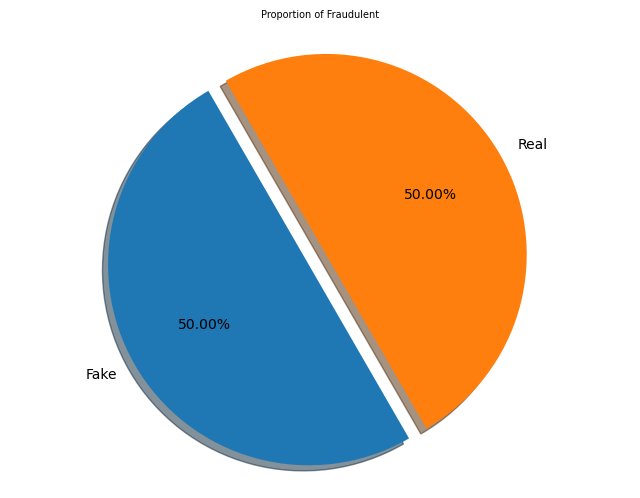

In [13]:


labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots(figsize=(8, 6)) 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) 
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show() 

In [14]:

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

15195    US
4093     GB
12403    US
6681     US
8430     US
         ..
17827    US
17828    AU
17829    PL
17830    US
17831    US
Name: country, Length: 1732, dtype: object

In [15]:
data['country'].nunique()

51

In [16]:
data['country'].value_counts()[:11]

country
US    1249
GB     147
AU      53
        43
GR      38
CA      31
NZ      23
DE      15
IN      14
MY      12
PH       9
Name: count, dtype: int64

Text(0.5, 0, 'Countries')

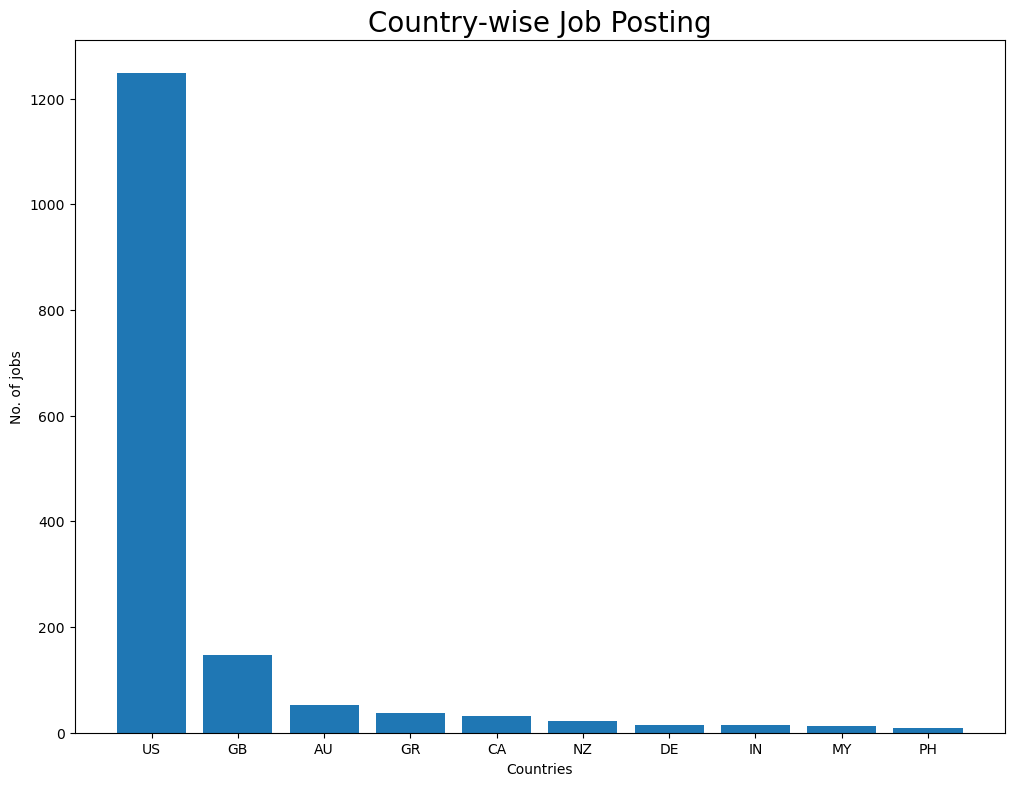

In [17]:
country = dict(data.country.value_counts()[:11])
del country[' '] 
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) 
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [18]:
country.keys()

dict_keys(['US', 'GB', 'AU', 'GR', 'CA', 'NZ', 'DE', 'IN', 'MY', 'PH'])

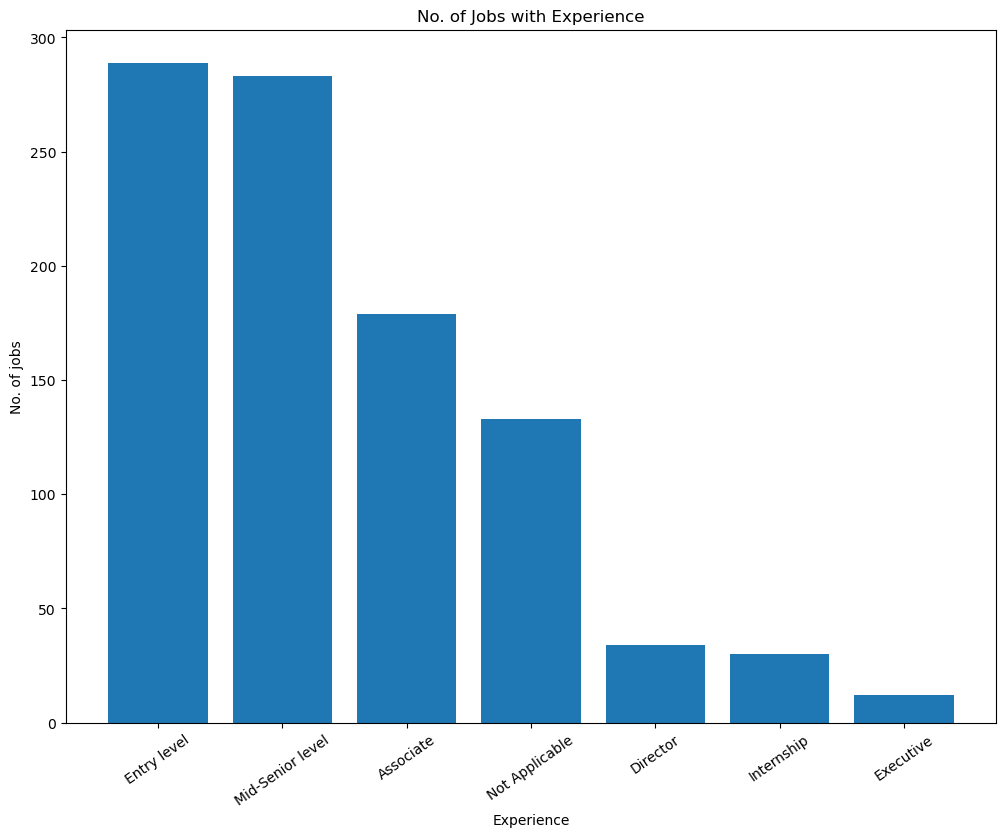

In [19]:
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [20]:
print(data.title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                17
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
English Teacher Abroad                                                  12
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Name: count, dtype: int64


In [21]:

print(data[data.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [22]:

data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [23]:
data.head()

,fraudulent,text
15195,0,"Life Insurance Agent - Orange County, CA US, C..."
4093,0,"Digital Account Manager GB, CMD, London Forwar..."
12403,0,"Full-Cycle Recruiter (Oil & Gas) US, TX, Houst..."
6681,0,"Creative Director US, NY, Brooklyn AREA 17 is ..."
8430,0,"Business Architect US, TX, Grapevine Cigniti I..."


In [24]:
import sys
print(sys.executable)
!<path-to-the-executable>/python -m pip install wordcloud


C:\Users\Narsimha\anaconda3\python.exe


The system cannot find the file specified.


**Understanding the common words used in the texts : Wordcloud**

In [25]:

!pip install WordCloud
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]]) 

In [26]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

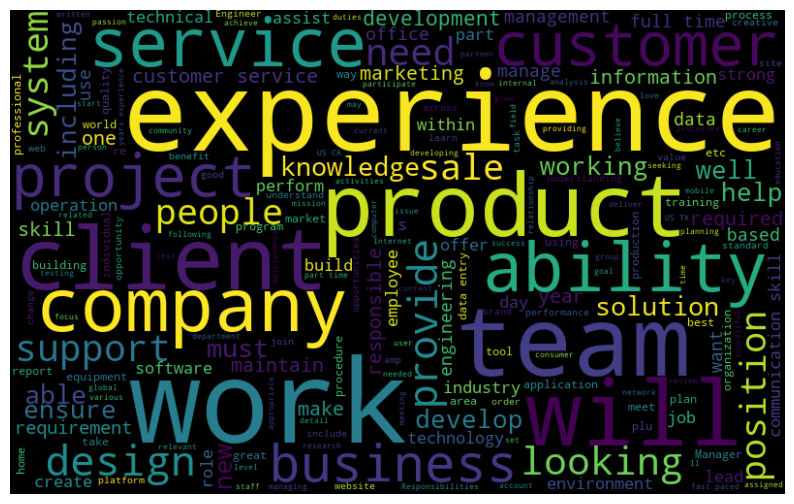

In [27]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)


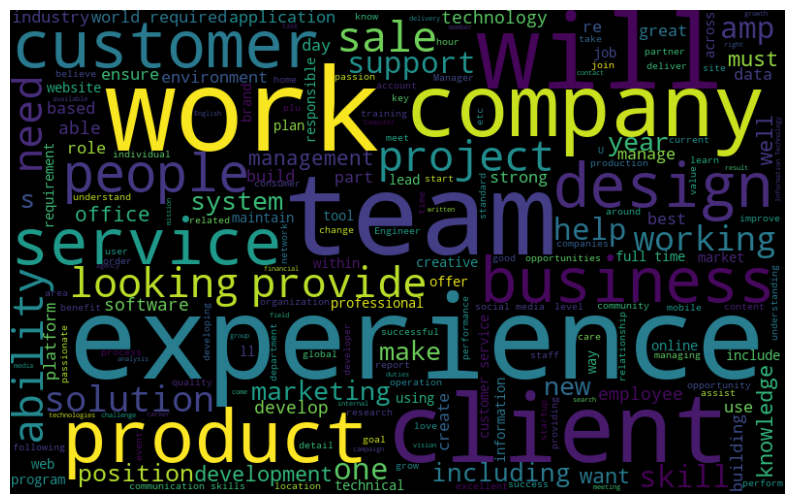

In [29]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])

In [31]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

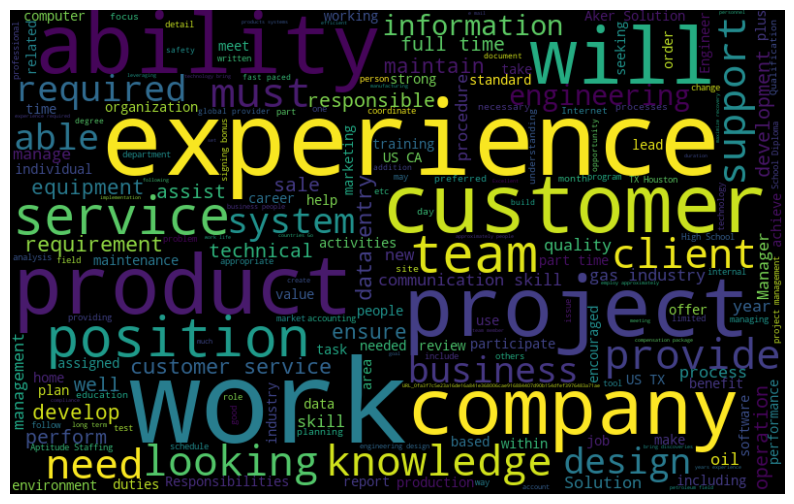

In [32]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data *Preapration*

In [33]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Narsimha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [36]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [37]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [38]:
#data['text'][0]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [40]:
# what does X-train and y_train contain
print(y_train)
print(X_train)


17143    1
8        0
17770    1
6560     1
3827     0
        ..
14198    0
12213    0
4365     0
3864     0
144      1
Name: fraudulent, Length: 1212, dtype: int64
17143    offering cash positions, immediate start. us, ...
8        hp bsm sme us, fl, pensacola solutions3 woman-...
17770    receptionist - administrative assistant us, tx...
6560     optician/lab technician us, ok, chickasha opto...
3827     property sales consultant gb, ess, chelmsford ...
                               ...                        
14198    javascript developer us, mi, 48226 ginkgotree ...
12213    senior sales executive - dallas/houston us, ca...
4365     video journalist, persian language us, dc, was...
3864     lead quality assuarance us, oh, roland &amp; a...
144      forward cap. group raised fund purchase homes ...
Name: text, Length: 1212, dtype: object


In [41]:

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

vect.fit(X_train)

X_train_dtm = vect.transform(X_train)


In [42]:
X_train_dtm

print(X_train_dtm)


  (0, 271)	1
  (0, 328)	1
  (0, 906)	1
  (0, 1273)	1
  (0, 1415)	1
  (0, 2077)	1
  (0, 2707)	1
  (0, 2947)	2
  (0, 3748)	1
  (0, 4134)	1
  (0, 4512)	1
  (0, 5536)	1
  (0, 5539)	1
  (0, 6328)	1
  (0, 6500)	1
  (0, 6676)	1
  (0, 7237)	1
  (0, 8007)	1
  (0, 8235)	1
  (0, 8385)	2
  (0, 8622)	1
  (0, 8928)	1
  (0, 9234)	1
  (0, 9254)	2
  (0, 9428)	1
  :	:
  (1211, 542)	1
  (1211, 1207)	1
  (1211, 2624)	1
  (1211, 2848)	1
  (1211, 6029)	1
  (1211, 6932)	1
  (1211, 7189)	1
  (1211, 7339)	1
  (1211, 7476)	1
  (1211, 7714)	1
  (1211, 7722)	1
  (1211, 7991)	2
  (1211, 8137)	1
  (1211, 9013)	2
  (1211, 9892)	1
  (1211, 9910)	1
  (1211, 10738)	1
  (1211, 13333)	1
  (1211, 13540)	1
  (1211, 13719)	1
  (1211, 15551)	1
  (1211, 15850)	1
  (1211, 15889)	1
  (1211, 16341)	1
  (1211, 16363)	1


In [43]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<520x19377 sparse matrix of type '<class 'numpy.int64'>'
	with 81291 stored elements in Compressed Sparse Row format>

# Model Building & evaluation

# LSTM (Long Short-Term Memory)

In [ ]:
# !pip install transformers
# !pip install torch
#!pip install tf-keras
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('fake_job_posting.csv')

362
# Identify your text and target columns
text_column = 'description'  # Using the job description column
target_column = 'fraudulent'  # Using the fraudulent column as the target

# Preprocess the text data: fill NaN values and convert to strings
df[text_column] = df[text_column].fillna('').astype(str)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df[text_column])
X = tokenizer.texts_to_sequences(df[text_column])
X = pad_sequences(X, padding='post')
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Predict using the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)



Epoch 1/3


C:\Users\Narsimha\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


 13/447 ━━━━━━━━━━━━━━━━━━━━ 26:51 4s/step - accuracy: 0.7451 - loss: 0.5777

In [ ]:
# After training the model
# After training the model
model.save('lstm_model.keras')


112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step
Classification Accuracy: 0.9493847874720358
Classification Report

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576

Confusion Matrix

[[3395    0]
 [ 181    0]]


C:\Users\Narsimha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Narsimha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Narsimha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


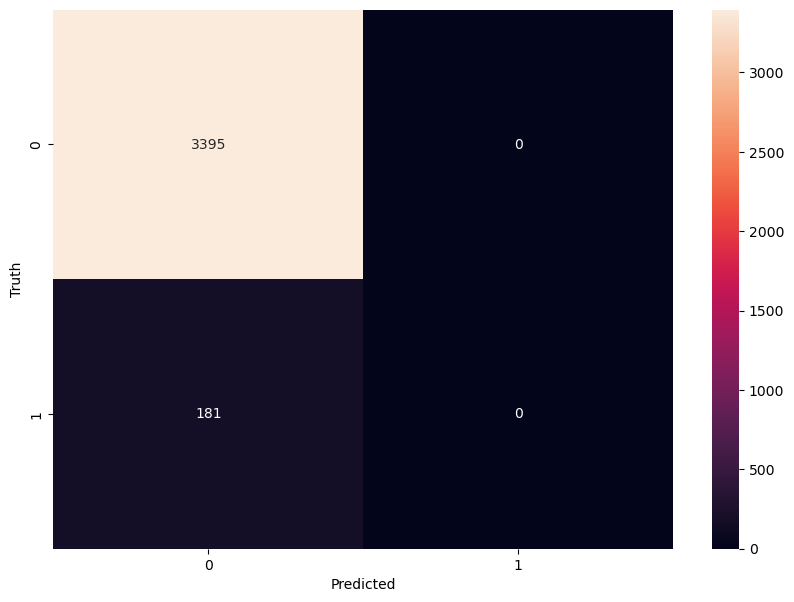

In [51]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('lstm_model.h5')

# Predict using the loaded model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


## Building a Predictive System

In [ ]:
X_test

In [ ]:
#print(X_test[6995])

In [ ]:
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping &amp; receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]

In [ ]:
input_data_features = vect.transform(input_text)


prediction = xgb.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(C=10))
])

pipeline.fit(X_train, y_train)
while True:
    job_description = input("Enter a job description to check if it's real or fake (or type 'exit' to quit): ")
    if job_description.lower() == 'exit':
        break
    prediction = pipeline.predict([job_description])[0]
    result = "____REAL____" if prediction == 0 else "____FAKE____"
    print()
    print()
    print(f'The job description is: {result}')

In [ ]:
#fake
#Looking for a few people to work from home. No experience required. Earn $5000 per week by working just 2 hours a day. Please send your resume and personal details to our email. Hurry up, limited positions available!

In [ ]:
#real
customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping &amp; receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software